# *PREDICTING BULLDOZER PRICES (TIME SERIES DATA)*

Data from Kaggle https://www.kaggle.com/c/bluebook-for-bulldozers

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
    

###  Training and validation data are from the past using them we need to predict the prices in the future


In [1]:
import numpy as np
import sklearn 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("DATA\TrainAndValid.csv",low_memory=False)

In [3]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(412698, 53)

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
df.saledate.dtype

dtype('O')

## Parsing Date and Time

In [7]:
# importing the data again
df= pd.read_csv("DATA\TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])

In [8]:
df.saledate.dtype

dtype('<M8[ns]')

In [9]:
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

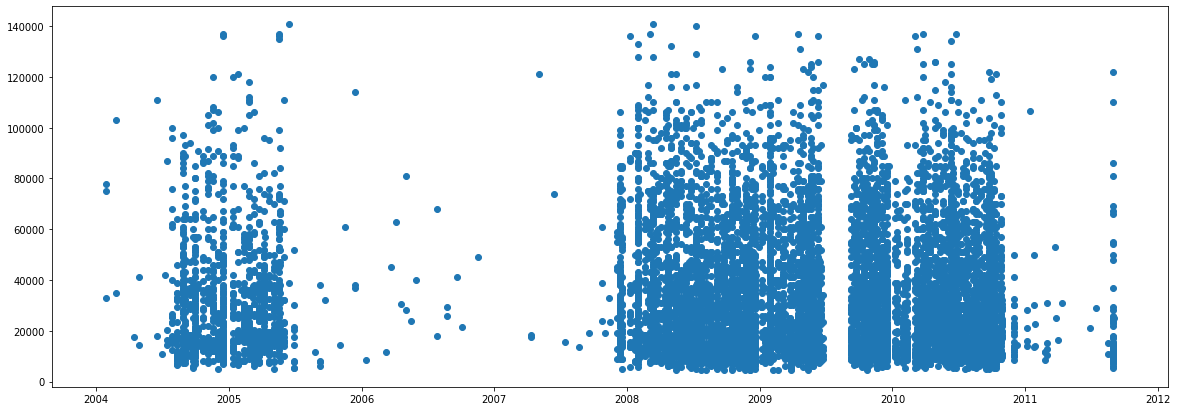

In [10]:
fig,ax =plt.subplots(figsize=(20,7))
ax.scatter(df.saledate[10000:20000],df.SalePrice[10000:20000])

In [11]:
df.saledate.head(20)
# It is unordered

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

In [12]:
df.sort_values(by=["saledate"],inplace=True)

In [13]:
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of Dataframe 

In [14]:
df_temp = df.copy()

In [15]:
df_temp.head().T.head()

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132


### Add sale date and time values to dataframe

In [16]:
df["saleYear"] = df.saledate.dt.year
df["saleMonth"] = df.saledate.dt.month
df["saleDay"] = df.saledate.dt.day
df["saleDayofWeek"] = df.saledate.dt.dayofweek
df["saleDayofYear"] = df.saledate.dt.dayofyear

In [17]:
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [18]:
df.drop("saledate",axis=1,inplace=True)

## Changing string values to Categories

In [19]:
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [20]:
pd.api.types.is_string_dtype(df.state)

True

In [21]:
c=0
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
        c+=1


UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [22]:
c

44

In [23]:
# converting all cols with object dtype to categories
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()
        


In [24]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayofYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [26]:
df.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [27]:
df.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [28]:
df.isna().sum()/len(df)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [29]:
df.to_csv("DATA/temp.csv",index=False)

## Filling Null Data

### Fill the numeric missing data first

In [30]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofWeek
saleDayofYear


In [31]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [32]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Add a binary column which tells us if the data was missing in the row
            df[label + "_is_missing"]= pd.isnull(content)
            
            df[label]=content.fillna(content.median())

In [33]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [34]:
df.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [35]:
df.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling the Categorical values and making them numeric

In [36]:
pd.Categorical(df.state).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [37]:
pd.Categorical(df.UsageBand).codes

array([-1, -1, -1, ..., -1, -1, -1], dtype=int8)

In [38]:
# to avoid getting the codes as -1 we add +1 to all codes
pd.Categorical(df.UsageBand).codes + 1

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [39]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
            # Add a column to indicate the missing values
            df[label + "_is_missing"] = pd.isnull(content)
            # Converting the Categorical values to numeric and adding 1
            df[label] = pd.Categorical(content).codes + 1
            

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


In [41]:
df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

## Modelling

In [42]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,random_state=42)

In [43]:
#fit the model
#model.fit(df.drop("SalePrice",axis=1),df.SalePrice)

In [44]:
#model.score(df.drop("SalePrice",axis=1),df.SalePrice)

### This model does not hold water

Need to split data into training and validation set 

In [45]:
df_val= df[df.saleYear ==2012]
df_train= df[df.saleYear!=2012]

In [46]:
df_train.shape,df_val.shape

((401125, 103), (11573, 103))

In [47]:
#spliting into X and y
X_train, y_train = df_train.drop("SalePrice",axis=1) , df_train.SalePrice
X_val, y_val = df_val.drop("SalePrice",axis=1) , df_val.SalePrice

In [48]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((401125, 102), (11573, 102), (401125,), (11573,))

Since the evaluation metric is root mean squared log error and there is not funcion for the same in SK-learn we need to create our own

In [50]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score

def rmsle (y_true, y_preds):
    '''
    Calculates Root Mean Squared Log Error Between True Labels and predicted Labels
    '''
    return np.sqrt(mean_squared_log_error(y_true, y_preds))

#Custom Evaluation Function

def scores (model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores={"Training MAE" : mean_absolute_error(y_train,train_preds),
            "Val MAE" : mean_absolute_error(y_val,val_preds),
            "Training RMSLE" : rmsle(y_train,train_preds),
            "Val RMSLE" : rmsle(y_val,val_preds),
            "Training R^2" : r2_score(y_train,train_preds),
            "Val R^2" : r2_score(y_val,val_preds)}
    return scores

In [51]:
#instead of using the whole data to train the model we will use less data to minimize training time

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)


In [53]:
%%time

model.fit(X_train,y_train)

Wall time: 17.3 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [54]:
scores(model)

{'Training MAE': 5561.2988092240585,
 'Val MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Val RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Val R^2': 0.8320374995090507}

## Hypertunning Model with Randomized Search CV

In [56]:
from sklearn.model_selection import RandomizedSearchCV

rs_grid = {"n_estimators" : np.arange(50,200,20),
           "max_depth":[None,3,5,10,15],
           "min_samples_split" : np.arange(2,20,5),
           "min_samples_leaf": np.arange(1,20,5),
           "max_features" : [0.5,1,"sqrt","auto"],
           "max_samples" : [10000]
          }

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42,),
                              param_distributions=rs_grid,
                              n_iter=5,
                              cv=5,
                              verbose=True
                             )

rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  4.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [58]:
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 2,
 'min_samples_leaf': 16,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 15}

In [57]:
scores(rs_model)

{'Training MAE': 6724.944164780444,
 'Val MAE': 8037.740435767335,
 'Training RMSLE': 0.30090772444786085,
 'Val RMSLE': 0.3217543062988798,
 'Training R^2': 0.8014046126383816,
 'Val R^2': 0.7893500356292897}

In [61]:
rs_grid = {"n_estimators" : np.arange(30,90,5),
           "min_samples_split" : np.arange(10,20,10),
           "min_samples_leaf": np.arange(1,5,5),
           "max_features" : [0.5],
           "max_samples" : [10000]
          }

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42,),
                              param_distributions=rs_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True
                             )

rs_model.fit(X_train,y_train)

D:\Machine_Learning\MLproject2\env\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 10.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [62]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.5}

In [63]:
scores(rs_model)

{'Training MAE': 5886.434011295322,
 'Val MAE': 7278.941246148968,
 'Training RMSLE': 0.2695063886699005,
 'Val RMSLE': 0.29975332749217515,
 'Training R^2': 0.8463859088099922,
 'Val R^2': 0.8309835002152974}

In [64]:
rs_grid = {"n_estimators" : np.arange(30,50,2),
           "min_samples_split" : np.arange(10,15,3),
           "min_samples_leaf": np.arange(1,3,1),
           "max_features" : [0.5],
           "max_samples" : [10000]
          }

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42,),
                              param_distributions=rs_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True
                             )

rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 15.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [65]:
rs_model.best_params_

{'n_estimators': 46,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.5}

In [66]:
scores(rs_model)

{'Training MAE': 5922.9836643404,
 'Val MAE': 7286.5721112202555,
 'Training RMSLE': 0.27064719766186346,
 'Val RMSLE': 0.30069922120965126,
 'Training R^2': 0.8443613322798659,
 'Val R^2': 0.8307759896997684}

In [123]:
model= RandomForestRegressor(n_jobs=-1,
                             n_estimators=40,
                             min_samples_split=14,
                             min_samples_leaf=1,
                             max_features=0.4,
                             random_state=42
                            )

In [124]:
%%time
model.fit(X_train,y_train)

Wall time: 58.7 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [125]:
scores(model)

{'Training MAE': 3051.3815475123024,
 'Val MAE': 5961.9933003959895,
 'Training RMSLE': 0.1485504347303444,
 'Val RMSLE': 0.24737349731875688,
 'Training R^2': 0.956321915853633,
 'Val R^2': 0.8820243502322576}

In [141]:
model2= RandomForestRegressor(n_jobs=-1,
                             n_estimators=46,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features=0.5,
                             random_state=42)
model2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=46, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [142]:
scores(model2)

{'Training MAE': 2601.9791226031625,
 'Val MAE': 5920.667267564865,
 'Training RMSLE': 0.12978737514024807,
 'Val RMSLE': 0.24545902939178516,
 'Training R^2': 0.9675370369788385,
 'Val R^2': 0.8828605078748429}

## To test the model we need to import the test data

In [157]:
df_test = pd.read_csv("DATA/Test.csv",parse_dates=["saledate"],low_memory=False)

### Preprocessing the data

In [158]:
def preprocessing (df):
    #Add sale date and time values to dataframe
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofWeek"] = df.saledate.dt.dayofweek
    df["saleDayofYear"] = df.saledate.dt.dayofyear  
    
    df.drop("saledate",axis=1 ,inplace =True)
    
    # converting all cols with object dtype to categories
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()  
       
                
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
              #Add a binary column which tells us if the data was missing in the row
               df[label + "_is_missing"]= pd.isnull(content)
            
               df[label]=content.fillna(content.median())  
        if not pd.api.types.is_numeric_dtype(content):
            # Add a column to indicate the missing values
            df[label + "_is_missing"] = pd.isnull(content)
            # Converting the Categorical values to numeric and adding 1
            df[label] = pd.Categorical(content).codes + 1
    return df        
                
            

In [159]:
df_testp=preprocessing(df_test)

In [162]:
df_testp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(45), float64(1), int16(2), int64(11), int8(42)
memory usage: 2.2 MB


In [161]:
X_train.shape

(401125, 102)

In [164]:
#since the test dataframe is missing one column we need to check which one is missing
set(X_train.columns)-set(df_testp.columns)

{'auctioneerID_is_missing'}

In [165]:
set(df_testp.columns)-set(X_train.columns)

set()

In [166]:
# Adding auctioneer_id_is_missing 
df_testp["auctioneerID_is_missing"] = False

In [167]:
df_testp.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


## Make Predictions

In [168]:
Y_preds=model2.predict(df_testp)

In [171]:
Y_preds

array([20049.88543266, 20592.22500024, 48905.15773478, ...,
       16506.97905356, 24707.81217575, 31366.41935963])

Kaggle Evaluation requires it in a csv format 

In [172]:
df_preds=pd.DataFrame()

df_preds["SalesID"]= df_testp.SalesID
df_preds["SalesPrice"] = Y_preds

In [173]:
df_preds

,SalesID,SalesPrice
0,1227829,20049.885433
1,1227844,20592.225000
2,1227847,48905.157735
3,1227848,65994.902618
4,1227863,47647.182388
...,...,...
12452,6643171,52317.737788
12453,6643173,18411.872367
12454,6643184,16506.979054
12455,6643186,24707.812176


In [175]:
df_preds.to_csv("DATA/test_predictions")

## Feature Importance

In [209]:
def plot_importance (features,importance,n=20):
    fig,ax = plt.subplots(figsize=(10,10))
    df_y=pd.DataFrame()
    df_y["Features"] = features
    df_y["Feature_Importance"] = importance
    df_y.sort_values(by=["Feature_Importance"],ascending=False,inplace=True)
   
    ax.barh(df_y.Features[:n],df_y.Feature_Importance[:n])
    ax.invert_yaxis()
    ax.set_xlabel("Feature Importance")

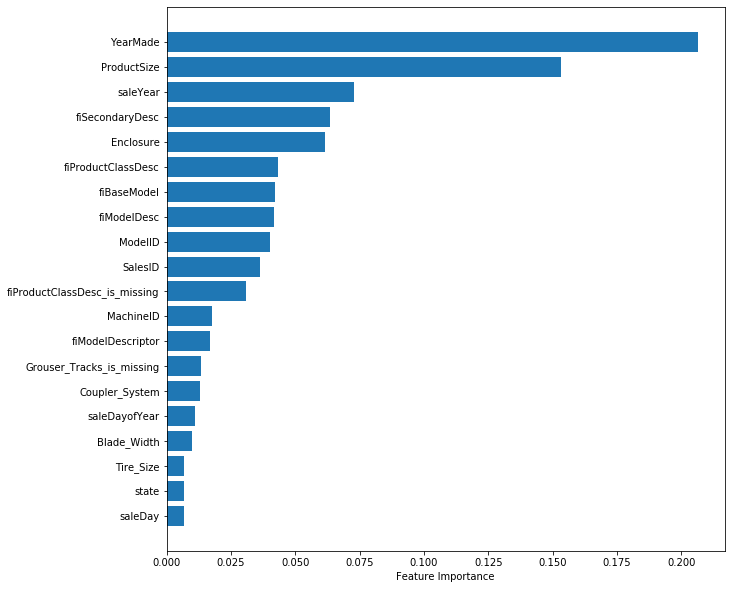

In [210]:
plot_importance(df_testp.columns,model2.feature_importances_)